# Import memory and install general libraries

In [85]:
#Import memory and install the session
#Import required general libraries
%matplotlib inline
from memory_profiler import memory_usage 


import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import librosa
import librosa.display
import IPython.display as ipd
import random

import seaborn as sns

from IPython.display import Audio

import scipy
from scipy import constants

import warnings
warnings.filterwarnings('ignore')

In [86]:
#%%capture
#!apt-get install libav-tools -y

In [87]:
from fastai.vision import *
import librosa
import librosa.display
import pylab
import matplotlib
import gc

# Upload CSV file

In [88]:
#Read 1st line of file
f = open('/kaggle/input/dataset/Data.csv', "r")

print(f.readline())

Age,Gender,Location,Sound type,Diagnosis,,,,,"Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M",



# Read data file

In [89]:
#Loading csv datafile
df = pd.read_csv('/kaggle/input/dataset/Data.csv')
df.head()

,Age,Gender,Location,Sound type,Diagnosis,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M",Unnamed: 10
0,70.0,M,P L L,I E W,Asthma,NaN,NaN,NaN,NaN,"Insipratory: I, Experiatory: E, Wheezes: W, Cr...",NaN
1,52.0,F,P L L,E W,Asthma,NaN,NaN,NaN,NaN,Crep:crepitations,NaN
2,50.0,F,P L L,I E W,Asthma,NaN,NaN,NaN,NaN,NaN,NaN
3,72.0,F,P R L,I C,Heart Failure + Lung Fibrosis,NaN,NaN,NaN,NaN,NaN,NaN
4,71.0,M,P R L,I C E W,Heart Failure + COPD,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#View asthma dataframe
df

,Age,Gender,Location,Sound type,Diagnosis,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M",Unnamed: 10
0,70.0,M,P L L,I E W,Asthma,NaN,NaN,NaN,NaN,"Insipratory: I, Experiatory: E, Wheezes: W, Cr...",NaN
1,52.0,F,P L L,E W,Asthma,NaN,NaN,NaN,NaN,Crep:crepitations,NaN
2,50.0,F,P L L,I E W,Asthma,NaN,NaN,NaN,NaN,NaN,NaN
3,72.0,F,P R L,I C,Heart Failure + Lung Fibrosis,NaN,NaN,NaN,NaN,NaN,NaN
4,71.0,M,P R L,I C E W,Heart Failure + COPD,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Statisitical Analysis

In [91]:
#Technical summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      112 non-null    float64
 1   Gender                                                                   112 non-null    object 
 2   Location                                                                 112 non-null    object 
 3   Sound type                                                               112 non-null    object 
 4   Diagnosis                                                                112 non-null    object 
 5   Unnamed: 5                                                               2 non-null      float64
 6   Unnamed: 6                                                               2

<Axes: >

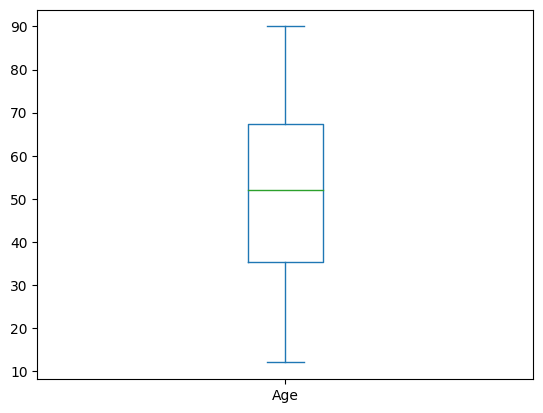

In [92]:
#Box plot age range
df["Age"].plot.box()

In [93]:
#Average Asthma patient Age by Gender

df[["Gender", "Age"]].groupby("Gender").mean()


,Age
Gender,
F,56.186047
M,46.884058


In [94]:
#Average age of patient split by diagnosis

df[["Diagnosis", "Age"]].groupby("Diagnosis").mean()

,Age
Diagnosis,
Asthma,44.294118
Asthma and lung fibrosis,90.000000
BRON,37.333333
COPD,54.875000
Heart Failure,54.000000
Heart Failure + COPD,68.000000
Heart Failure + Lung Fibrosis,72.000000
Lung Fibrosis,65.000000
N,43.114286


In [95]:
#Update column names and create new column of Diagnosis with update headings 
#The NA rows from row 134 onwards are blank when opened in excel
df["Diagnosis2"] = df["Diagnosis"].replace({"asthma": "Asthma", "copd": "COPD", "heart failure": "Heart Failure", "pneumonia": "Pneumonia", "Asthma and lung fibrosis": "Asthma and Lung Fibrosis","N": "Normal", "Heart Failure + COPD" : "Heart Failure and COPD", "Heart Failure + Lung Fibrosis" : "Heart Failure and Lung Fibrosis"})
df["Diagnosis2"]


0                              Asthma
1                              Asthma
2                              Asthma
3      Heart Failure + Lung Fibrosis 
4              Heart Failure and COPD
                    ...              
149                               NaN
150                               NaN
151                               NaN
152                               NaN
153                               NaN
Name: Diagnosis2, Length: 154, dtype: object

In [96]:
#Average Asthma age with updated diagnosis column 
df[["Diagnosis2", "Age"]].groupby("Diagnosis2").mean()

,Age
Diagnosis2,
Asthma,45.937500
Asthma and Lung Fibrosis,90.000000
BRON,37.333333
COPD,57.222222
Heart Failure,58.777778
Heart Failure + Lung Fibrosis,72.000000
Heart Failure and COPD,68.000000
Lung Fibrosis,65.000000
Normal,43.114286


In [97]:
#Make all diagnosis lower case
df["Diagnosis"].str.title()

0                              Asthma
1                              Asthma
2                              Asthma
3      Heart Failure + Lung Fibrosis 
4                Heart Failure + Copd
                    ...              
149                               NaN
150                               NaN
151                               NaN
152                               NaN
153                               NaN
Name: Diagnosis, Length: 154, dtype: object

In [98]:
#What is the mean age for each of the gender and diagnosis combinations?
df.groupby(["Gender", "Diagnosis"])["Age"].mean()

Gender  Diagnosis                     
F       Asthma                            45.000000
        BRON                              68.000000
        COPD                              58.000000
        Heart Failure + Lung Fibrosis     72.000000
        Lung Fibrosis                     83.000000
        N                                 51.090909
        asthma                            52.250000
        heart failure                     70.125000
        pneumonia                         53.000000
M       Asthma                            43.500000
        Asthma and lung fibrosis          90.000000
        BRON                              22.000000
        COPD                              54.428571
        Heart Failure                     54.000000
        Heart Failure + COPD              68.000000
        Lung Fibrosis                     47.000000
        N                                 39.458333
        Plueral Effusion                  75.500000
        asthma           

In [99]:
#check for missing values
df.isna()

,Age,Gender,Location,Sound type,Diagnosis,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Posterior: P Lower: L Left: L Right R, UPPER: U, ANTERIOR: A, MIDDLE: M",Unnamed: 10,Diagnosis2
0,False,False,False,False,False,True,True,True,True,False,True,False
1,False,False,False,False,False,True,True,True,True,False,True,False
2,False,False,False,False,False,True,True,True,True,True,True,False
3,False,False,False,False,False,True,True,True,True,True,True,False
4,False,False,False,False,False,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149,True,True,True,True,True,True,True,True,True,True,True,True
150,True,True,True,True,True,True,True,True,True,True,True,True
151,True,True,True,True,True,True,True,True,True,True,True,True
152,True,True,True,True,True,False,False,True,True,True,True,True


# Upload Lung audio sound files

In [100]:
#Loading all sound files saved / loaded into input folder
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/sounds'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 3000:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [101]:
#View 1st 5 lines of labels 
labels[:5]

['asthmae wa r l40m',
 'asthmae wp l u41f',
 'copde wp l m53m',
 'heart failureca r m54m',
 'nna r u65f']

In [102]:
#Create a dataframe of speech and labels
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/sounds/BP77_AsthmaE WA R L40M.wav,asthmae wa r l40m
1,/kaggle/input/sounds/EP46_asthmaE WP L U41F.wav,asthmae wp l u41f
2,/kaggle/input/sounds/EP62_COPDE WP L M53M.wav,copde wp l m53m
3,/kaggle/input/sounds/EP14_Heart FailureCA R M5...,heart failureca r m54m
4,/kaggle/input/sounds/DP84_NNA R U65F.wav,nna r u65f


In [103]:
#States the character Length of file path
len(paths)

336

In [104]:
#Shows the 1st 10 files in the file path
paths[:10]

['/kaggle/input/sounds/BP77_AsthmaE WA R L40M.wav',
 '/kaggle/input/sounds/EP46_asthmaE WP L U41F.wav',
 '/kaggle/input/sounds/EP62_COPDE WP L M53M.wav',
 '/kaggle/input/sounds/EP14_Heart FailureCA R M54M.wav',
 '/kaggle/input/sounds/DP84_NNA R U65F.wav',
 '/kaggle/input/sounds/EP2_AsthmaE WP L L R52F.wav',
 '/kaggle/input/sounds/EP21_BRONCrepP R L 20M.wav',
 '/kaggle/input/sounds/BP103_NNP R U81F.wav',
 '/kaggle/input/sounds/BP64_asthmaE WP L U60M.wav',
 '/kaggle/input/sounds/EP29_heart failureCrepP L L57M.wav']

# Random selected some sounds and explored sample rates

In [105]:
%%capture
!apt-get install libav-tools -y

In [106]:
#Sample 1 - Sampled: 1 Normal sound and played
ipd.Audio('/kaggle/input/sounds/BP100_NNP R M70F.wav')

In [107]:
#Sample 1 - Sampled: Normal sound sound rate
import scipy
from scipy import constants

rate, data = scipy.io.wavfile.read('/kaggle/input/sounds/BP100_NNP R M70F.wav')
print('Sound rate for Normal sound is:',(rate))

Sound rate for Normal sound is: 4000


In [108]:
#Sample 2 - Sampled a Asthma sound and played
ipd.Audio('/kaggle/input/sounds/BP10_AsthmaE WP R U59M.wav')

In [109]:
#Sample 2 - Sampled: Asthma sound sound rate
rate, data = scipy.io.wavfile.read('/kaggle/input/sounds/BP10_AsthmaE WP R U59M.wav')
print('Sound rate for Asthma is:',(rate))

Sound rate for Asthma is: 4000


In [110]:
#Sample 3 - Sampled a Heart Failure sound and played
ipd.Audio('/kaggle/input/sounds/BP14_Heart FailureCA R M54M.wav')

In [111]:
#Sample 3 - Sampled: Heart Failure sound sound rate
rate, data = scipy.io.wavfile.read('/kaggle/input/sounds/BP14_Heart FailureCA R M54M.wav')
print('Sound rate for Heart Failure is:',(rate))

Sound rate for Heart Failure is: 4000


In [112]:
#Sample 4 - Sampled a Lung Fibrosis sound and played
ipd.Audio('/kaggle/input/sounds/BP105_Lung FibrosisCrepA U R44M.wav')

In [113]:
#Sample 4 - Sampled: Lung Fibrosis sound sound rate
rate, data = scipy.io.wavfile.read('/kaggle/input/sounds/BP14_Heart FailureCA R M54M.wav')
print('Sound rate for Lung Fibrosis is:',(rate))

Sound rate for Lung Fibrosis is: 4000


# Exploratory Data Analysis (EDA)

In [114]:
#Random sampled 1 data sound wav file
data, sampling_rate = librosa.load('/kaggle/input/sounds/BP105_Lung FibrosisCrepA U R44M.wav')

In [115]:
#Review of data array
data

array([6.3329935e-07, 7.0780516e-07, 5.8114529e-07, ..., 3.6653750e-02,
       1.9096114e-02, 0.0000000e+00], dtype=float32)

In [116]:
#display sampling rate
sampling_rate

22050

Class: asthmai e wp l l70m.wav


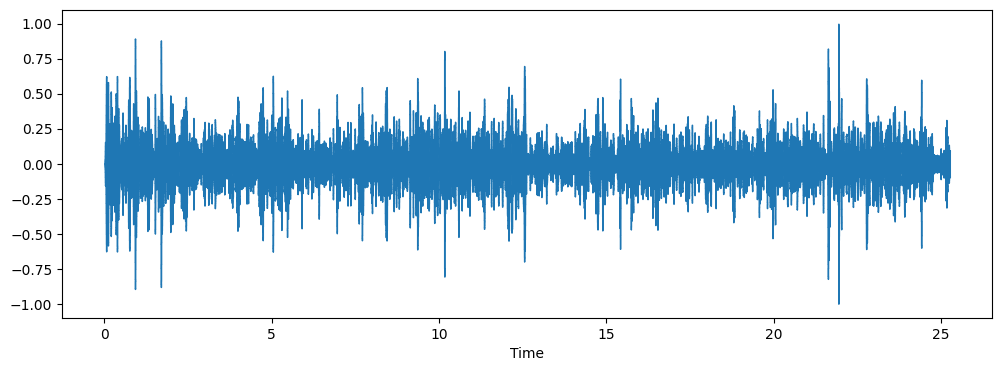

In [117]:
#Random sampling of sound graphs
index = random.choice(df.index)
print('Class:', df['label'][index]  + '.wav')

#data, sampling_rate = librosa.load('/kaggle/input/'+str(df['label'][index]) + '.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

# Create Spectrogram

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [119]:
#Make working directory
!mkdir /kaggle/working/train

mkdir: cannot create directory ‘/kaggle/working/train’: File exists


In [120]:
#Merics for creating the spectrogram images
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('/kaggle/working/train' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [121]:
#Data directory path
Data_dir= np.array(glob("/kaggle/input/sounds/*"))

In [122]:
#Show items in directory
for item in Data_dir:
    print(item)

/kaggle/input/sounds/BP77_AsthmaE WA R L40M.wav
/kaggle/input/sounds/EP46_asthmaE WP L U41F.wav
/kaggle/input/sounds/EP62_COPDE WP L M53M.wav
/kaggle/input/sounds/EP14_Heart FailureCA R M54M.wav
/kaggle/input/sounds/DP84_NNA R U65F.wav
/kaggle/input/sounds/EP2_AsthmaE WP L L R52F.wav
/kaggle/input/sounds/EP21_BRONCrepP R L 20M.wav
/kaggle/input/sounds/BP103_NNP R U81F.wav
/kaggle/input/sounds/BP64_asthmaE WP L U60M.wav
/kaggle/input/sounds/EP29_heart failureCrepP L L57M.wav
/kaggle/input/sounds/DP34_heart failureCrepP R M78F.wav
/kaggle/input/sounds/BP28_BRONCrepP L U68F.wav
/kaggle/input/sounds/BP85_NNA R U33M.wav
/kaggle/input/sounds/BP71_NNP R U36M.wav
/kaggle/input/sounds/DP108_COPDE WP R L 63M.wav
/kaggle/input/sounds/BP21_BRONCrepP R L 20M.wav
/kaggle/input/sounds/DP7_Heart Failure  COPDI C E WP L R65M.wav
/kaggle/input/sounds/EP11_Heart FailureCP L L53M.wav
/kaggle/input/sounds/DP42_heart failureCrepP L L56M.wav
/kaggle/input/sounds/EP99_NNP R M50M.wav
/kaggle/input/sounds/BP112

In [123]:
#acessing each file and creating spectogram 
#using create_spectrogram and save it in provided folder
for i,item in enumerate(Data_dir):
   
    x = item.split("/")[4].split(".")[0]
    x  = str(i) + x
    print(x)
    create_spectrogram(item,x)

0BP77_AsthmaE WA R L40M
1EP46_asthmaE WP L U41F
2EP62_COPDE WP L M53M
3EP14_Heart FailureCA R M54M
4DP84_NNA R U65F
5EP2_AsthmaE WP L L R52F
6EP21_BRONCrepP R L 20M
7BP103_NNP R U81F
8BP64_asthmaE WP L U60M
9EP29_heart failureCrepP L L57M
10DP34_heart failureCrepP R M78F
11BP28_BRONCrepP L U68F
12BP85_NNA R U33M
13BP71_NNP R U36M
14DP108_COPDE WP R L 63M
15BP21_BRONCrepP R L 20M
16DP7_Heart Failure  COPDI C E WP L R65M
17EP11_Heart FailureCP L L53M
18DP42_heart failureCrepP L L56M
19EP99_NNP R M50M
20BP112_NNP L M30M
21DP13_Heart FailureCP L L55M
22EP91_asthmaE WP R U43F
23DP44_asthmaE WP R U40M
24BP78_AsthmaE WP R M20M
25BP4_Heart Failure  Lung Fibrosis I CP L R72F
26EP47_asthmaE WP L M60M
27BP54_heart failureCrepP R L 73F
28EP53_asthmaE WP R M72F
29DP41_pneumoniaCrepP R M51M
30DP82_NNP L U38M
31DP102_NNP L L41M
32EP73_NNP L L32M
33EP82_NNP L U38M
34EP16_heart failureCP R U56M
35EP89_NNP L M70M
36DP62_COPDE WP L M53M
37EP83_NNA R U18F
38EP66_heart failureCrepP R L 43M
39DP8_Plueral Ef

# Dowload directory

In [124]:
# use this code to download any directory in to your system
!zip -r file.zip /kaggle/working

from IPython.display import FileLink
FileLink(r'file.zip')

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/train132DP19_heart failureCP R U70F.jpg (deflated 6%)
updating: kaggle/working/train68BP75_NNP L U73F.jpg (deflated 17%)
updating: kaggle/working/train13BP71_NNP R U36M.jpg (deflated 18%)
updating: kaggle/working/train325DP23_Lung FibrosisCrepP R L 50M.jpg (deflated 2%)
updating: kaggle/working/train207EP81_NNP L U33M.jpg (deflated 5%)
updating: kaggle/working/train314DP22_BRONCrepP R U24M.jpg (deflated 4%)
updating: kaggle/working/train10DP34_heart failureCrepP R M78F.jpg (deflated 5%)
updating: kaggle/working/train248DP11_Heart FailureCP L L53M.jpg (deflated 7%)
updating: kaggle/working/train220BP61_COPDE WP R L 53M.jpg (deflated 17%)
updating: kaggle/working/train21DP13_Heart FailureCP L L55M.jpg (deflated 4%)
updating: kaggle/working/train231EP97_AsthmaE WP R U24M.jpg (deflated 4%)
updating: kaggle/working/train177EP108_COPDE WP R L 63M.jpg (deflated 5%)
updating: kaggle/working/train99EP40_heart failureCrepA R M26M.jpg

/kaggle/working/file.zip

# Image Reading

In [125]:
#image reading
import cv2

In [126]:
#Import libraries
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [127]:
#Creating blank array for images and labels
images =[] #for Y is 0 = Not Asthma
labels =[] #for X is 1 = Asthma

In [128]:
#Reading all images and labels 
dir= np.array(glob("/kaggle/input/spectrogram/*"))
for item in dir:
    imagePath = item
    
    #print("reading:-",item)
    label = item.split('/')[4].split(".")[0].split("_")[1]
    print("appending:-",label)
    im = cv2.imread(imagePath)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    images.append(im_resized)
    labels.append(label)

appending:- NNP R U24F
appending:- NNP L L24M
appending:- pneumoniaCrepP R M36F
appending:- pneumoniaCrepA R L70F
appending:- NNP R L 66F
appending:- asthmaE WP R M72F
appending:- AsthmaE WP R M43F
appending:- asthmaE WP R M72F
appending:- NNP L L41M
appending:- NNA R U18F
appending:- Heart FailureCA R M54M
appending:- AsthmaE WP R M20M
appending:- NNP L L32M
appending:- NNP R L 66F
appending:- NNP R M74M
appending:- AsthmaI E WP L L70M
appending:- Heart Failure  Lung Fibrosis I CP L R72F
appending:- NNP R L 66F
appending:- NNP L M30M
appending:- asthmaE WP R L 21F
appending:- NNP L M26M
appending:- NNP R U36M
appending:- NNA R U18F
appending:- AsthmaE WP R M20M
appending:- Lung FibrosisCrepP R L 50M
appending:- NNA L U31M
appending:- heart failureCrepP R L 83F
appending:- pneumoniaBronchialP R L 64M
appending:- Heart FailureCP L L53M
appending:- COPDE WP R L 53M
appending:- AsthmaI E WP L L R50F
appending:- COPDE WP R L 53M
appending:- COPDE WP L L62M
appending:- asthmaE WP R M53F
app

In [129]:
#All images in array
images[0]

array([[[  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0],
        ...,
        [ 12,   0,   0],
        [ 19,   0,   0],
        [ 52,  20,  25]],

       [[  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0],
        ...,
        [ 12,   0,   0],
        [ 19,   0,   0],
        [ 52,  20,  25]],

       [[  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0],
        ...,
        [ 12,   0,   0],
        [ 19,   0,   0],
        [ 52,  20,  25]],

       ...,

       [[106,  69, 193],
        [104,  85, 209],
        [133, 151, 254],
        ...,
        [101, 110, 243],
        [102, 116, 246],
        [ 97, 126, 250]],

       [[103,  64, 186],
        [ 98,  78, 201],
        [124, 142, 254],
        ...,
        [ 95, 117, 247],
        [ 94, 122, 247],
        [ 88, 131, 252]],

       [[105,  59, 182],
        [ 94,  70, 194],
        [117, 134, 254],
        ...,
        [ 89, 114, 246],
        [ 87, 119, 246],
        [ 78, 127, 249]]

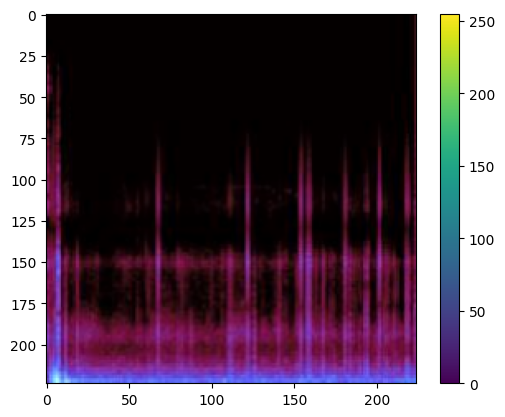

In [130]:
#Inspect images in the training set. We can see the pixels value is less than 150.
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [131]:
#Processing the labels into Asthma and Not Asthma
y =[]
for i, item in enumerate(labels):
    item = item.lower()
    if 'asthma' in item:
        y.append("asthma")
    else:
        y.append("not asthma")

In [132]:
# To view data split. Not asthma = 0 and Asthma = 1
sample = pd.DataFrame(y)

print("here is count of asthma and non-asthma \n", sample[0].value_counts())

here is count of asthma and non-asthma 
 0
not asthma    237
asthma         99
Name: count, dtype: int64


In [133]:
#Converting images to array and normalizing it.
#Do not need the images in grey sacle don't need to chooise 0 to 1 (grey scale range.)
#The pixel value falls within 0 to 100 for this project.
X = np.array(images).reshape(-1, 224, 224, 3)
X = X/255

In [134]:
#Sample view of 15 labels
y[:15]

['not asthma',
 'not asthma',
 'not asthma',
 'not asthma',
 'not asthma',
 'asthma',
 'asthma',
 'asthma',
 'not asthma',
 'not asthma',
 'not asthma',
 'asthma',
 'not asthma',
 'not asthma',
 'not asthma']

# Label Encoder

In [135]:
#Used label enoder inorder to get equivilent of one hot encoding on catergorical target variable
#Processing the labels into Asthma (1) and Not Asthma (0)

le = LabelEncoder()
encoded_label = le.fit_transform(y) # 0 Not Asthma , 1 Asthma
y = to_categorical(encoded_label)

In [136]:
#View 1st 15 in array encoding of: Asthma (1) or Not Asthma (0)
y[:15]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Data split (Train/Test)

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
#Dataset split: Train 80% and Test 20%
#Data shuffling of 4 was applied as random_state before applying the train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Random Forest (RF)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
#For Ensemble methods the data needs to be in 1 clear array
#encoded label where 1 represent Asthma and 0 represent Not Asthma
encoded_label

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [143]:
#Train test split for random forest and SVM
X_train, X_test, y_train, y_test = train_test_split(X, encoded_label, test_size = 0.2, random_state = 4)

In [144]:
#Shows number of samples in Training
nsamples, nx, ny, nrgb = X_train.shape
print(nsamples, nx, ny, nrgb)

268 224 224 3


In [145]:
#Create new train data for random forest as images can't be diretly passed
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [146]:
#Shows number of samples in Testing
nsamples, nx, ny, nrgb = X_test.shape
print(nsamples, nx, ny, nrgb)
X_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

68 224 224 3


# 1st RF Model at 50 max_depth

In [147]:
#Training the 1st random forest model
rf = RandomForestClassifier(n_estimators = 640,
                            min_samples_split = 5,
                            min_samples_leaf = 1,
                            max_depth = 50,
                            bootstrap = False
                           )

                            
rf.fit(x_train2,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_split=5,
                       n_estimators=640)

In [148]:
#Testing the accuracy of model
rf.score(X_test2, y_test)

0.8529411764705882

In [149]:
#Show model accuracy
print("Model accuracy",rf.score(X_test2, y_test))

Model accuracy 0.8529411764705882


In [150]:
prediction_rf = rf.predict(X_test2)

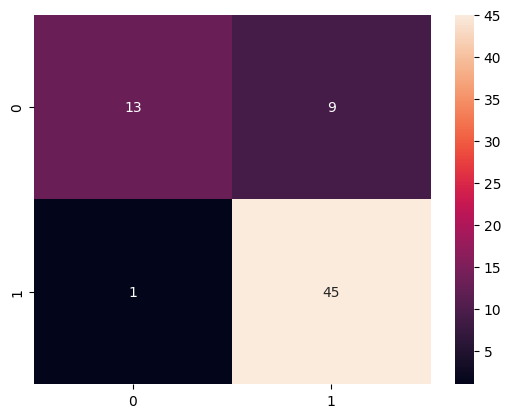

In [154]:
#Confussion Matrix
CM = confusion_matrix(y_test, prediction_rf)
seaborn.heatmap(CM,annot=True)
plt.show()

In [155]:
#Classification evaluation report
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72        22
           1       0.83      0.98      0.90        46

    accuracy                           0.85        68
   macro avg       0.88      0.78      0.81        68
weighted avg       0.86      0.85      0.84        68



# 2nd RF Model at 1000 max_depth

In [172]:
#Training the 2nd random forest model
rf2 = RandomForestClassifier(n_estimators = 64,
                            min_samples_split = 5,
                            min_samples_leaf = 1,
                            max_depth = 1000,
                            bootstrap = False
                           )

                            
rf2.fit(x_train2,y_train)

RandomForestClassifier(bootstrap=False, max_depth=1000, min_samples_split=5,
                       n_estimators=64)

In [173]:
#Testing the accuracy of model
rf2.score(X_test2, y_test)

0.8382352941176471

In [174]:
#Show model accuracy
print("Model accuracy",rf2.score(X_test2, y_test))

Model accuracy 0.8382352941176471


In [175]:
prediction_rf2 = rf2.predict(X_test2)

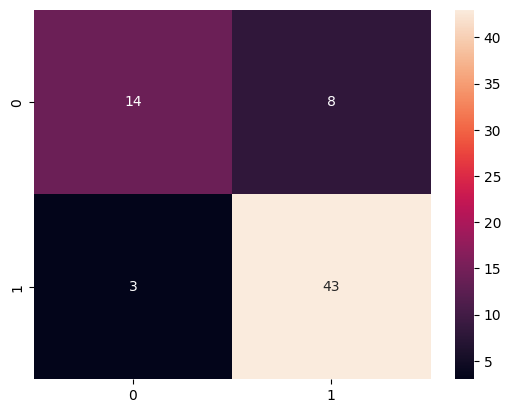

In [176]:
#Confussion Matrix
CM = confusion_matrix(y_test, prediction_rf2)
seaborn.heatmap(CM,annot=True)
plt.show()

In [177]:
#Classification evaluation report
print(classification_report(y_test, prediction_rf2))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.84      0.93      0.89        46

    accuracy                           0.84        68
   macro avg       0.83      0.79      0.80        68
weighted avg       0.84      0.84      0.83        68



# Support Vector Machines (SVM)

In [178]:
from sklearn.svm import SVC

# 1st SVM Model at 50 max_iter

In [179]:
#Create SVM model with specific metrics
svc = SVC(gamma='auto', max_iter=50, random_state =10)
svc.fit(x_train2,y_train)

SVC(gamma='auto', max_iter=50, random_state=10)

In [180]:
#Create 1st SVM prediction model on test dataset
prediction_svm=svc.predict(X_test2)

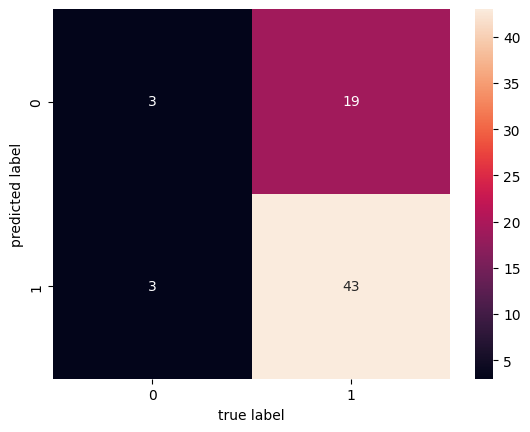

In [181]:
#Confussion Matrix 
CM = confusion_matrix(y_test, prediction_svm)
seaborn.heatmap(CM,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [182]:
#Classification evaluation report
print(classification_report(y_test, prediction_svm))

              precision    recall  f1-score   support

           0       0.50      0.14      0.21        22
           1       0.69      0.93      0.80        46

    accuracy                           0.68        68
   macro avg       0.60      0.54      0.51        68
weighted avg       0.63      0.68      0.61        68



# 2nd SVM Model at 1000 max_iter

In [183]:
#Create SVM model with specific metrics
svc = SVC(gamma='auto', max_iter=1000, random_state =10)
svc.fit(x_train2,y_train)

SVC(gamma='auto', max_iter=1000, random_state=10)

In [184]:
#Create 2nd SVM prediction model on test dataset
prediction_svm2=svc.predict(X_test2)

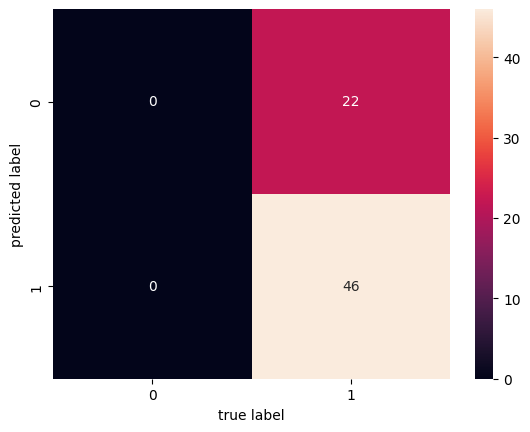

In [185]:
#Confusion metrics
CM = confusion_matrix(y_test, prediction_svm2)
seaborn.heatmap(CM,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [186]:
#Classification evaluation report
print(classification_report(y_test, prediction_svm2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.68      1.00      0.81        46

    accuracy                           0.68        68
   macro avg       0.34      0.50      0.40        68
weighted avg       0.46      0.68      0.55        68

